# Unidade 4: análise descritiva de dados - síntese numérica

## Introdução

Neste módulo, o foco é a síntese numérica para análise descritiva de dados. Dessa forma, iniciamos abordando o que é síntese numérica: um conjunto de ferramentas que nos ajuda a sintetizar (resumir) grandes quantidades de dados, de modo a facilitar a compreensão e, ao mesmo tempo, evitar ao máximo a perda de informação relevante.

## Medidas de tendência central

Tendência central é uma maneira de resumir informação. Através dela, escolhemos um único valor que irá representar todos os outros valores do conjunto de dados escolhido.

Para realizar esta tarefa, podemos utilizar três medidas distintas, cada uma com suas aplicações: média, mediana e moda.

### Média aritmética simples

Média aritmética simples, ou apenas média, é a técnica mais conhecida e utilizada como medida de tendência central. Consiste em realizar o somatório de todos os valores do conjunto e, então, dividir o resultado pelo número total de valores somados.

Por exemplo:

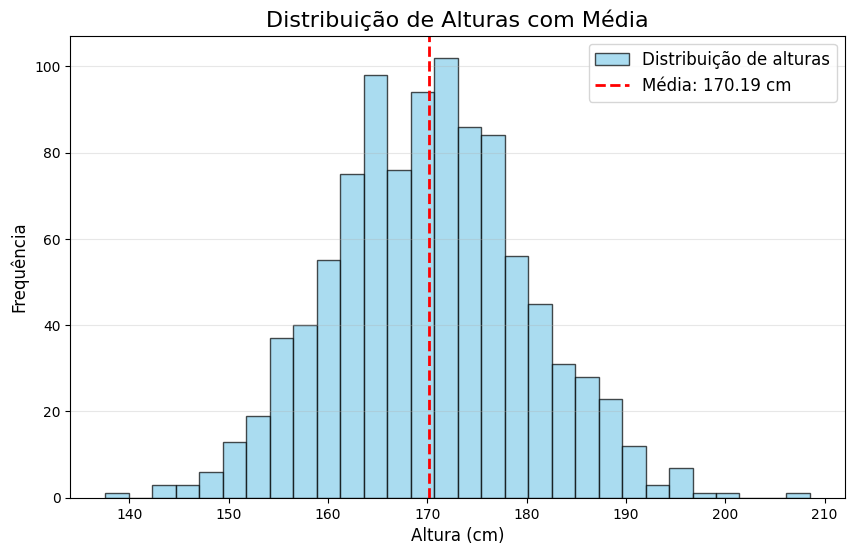

In [ ]:
import numpy as np # Biblioteca para gerar os dados aleatórios
import matplotlib.pyplot as plt

# Gerar dados aleatórios (alturas de pessoas em cm)
np.random.seed(42)  # Para reproduzibilidade
dados = np.random.normal(loc=170, scale=10, size=1000)  # Média 170cm, desvio padrão 10cm

# Calcular a média
media = np.mean(dados)

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(dados, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Distribuição de alturas')

# Adicionar linha vertical para a média
plt.axvline(media, color='red', linestyle='dashed', linewidth=2,
            label=f'Média: {media:.2f} cm')

# Configurações do gráfico
plt.title('Distribuição de Alturas com Média', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Mostrar o gráfico
plt.show()

### Mediana

A mediana funciona como o "valor do meio" de um conjunto de dados, quanto este está ordenado. Ou seja, a mediana é um valor em que metade dos valores do conjunto está acima dela e, a outra metade, está abaixo.

Para um conjunto de tamanho ímpar, há apenas um valor do meio. Já para um conjunto de tamanho par, existem dois valores do meio, bastando realizar a média entre eles para obter a mediana, neste caso.

Por exemplo:

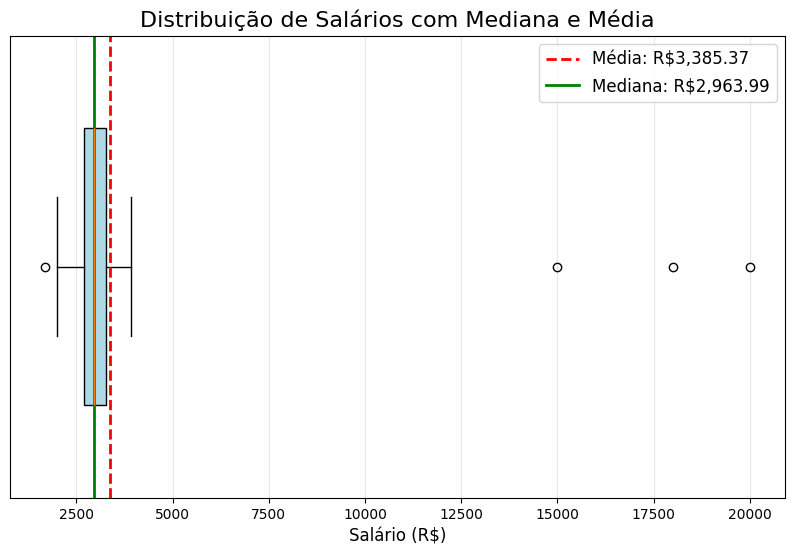

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados com outliers (salários em uma empresa em R$)
np.random.seed(42)
dados = np.concatenate([
    np.random.normal(loc=3000, scale=500, size=98),  # 98 funcionários com salários normais
    np.array([15000, 18000, 20000])  # 3 diretores com salários altos
])

# Calcular média e mediana
media = np.mean(dados)
mediana = np.median(dados)

# Criar o boxplot
plt.figure(figsize=(10, 6))

# Boxplot principal
box = plt.boxplot(dados, vert=False, patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 widths=0.6)

# Adicionar linhas para média e mediana
plt.axvline(media, color='red', linestyle='dashed', linewidth=2,
            label=f'Média: R${media:,.2f}')
plt.axvline(mediana, color='green', linestyle='solid', linewidth=2,
            label=f'Mediana: R${mediana:,.2f}')

# Configurações do gráfico
plt.title('Distribuição de Salários com Mediana e Média', fontsize=16)
plt.xlabel('Salário (R$)', fontsize=12)
plt.yticks([])  # Remover ticks do eixo y
plt.legend(fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Mostrar o gráfico
plt.show()

Note que a média está mais afastada do centro da barra azul, que é onde valores do conjunto se concentram, enquanto que a mediana se aproxima muito mais do meio. Isso ocorre porque a média é muito mais afetada por valores extremos do que a mediana.

### Moda

A moda representa o valor mais frequente em um conjunto de dados. A moda também pode ser utilizada para conjuntos qualitativos, pois também pode representar o elemento mais repetido do conjunto, tendo o nome de classe modal, neste caso.

É uma medida mais comum para lidar com variáveis que possuem distribuição de frequências multimodais.

Por exemplo:

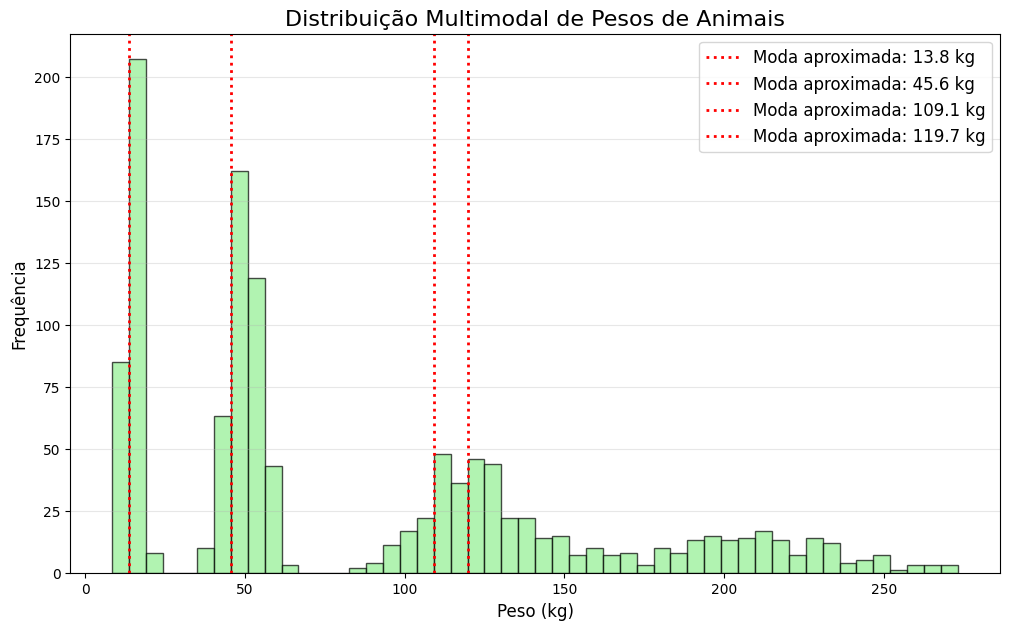

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Criar dados multimodais (pesos de animais em um zoológico - kg)
np.random.seed(42)
dados = np.concatenate([
    np.random.normal(loc=15, scale=2, size=300),   # Pequenos roedores
    np.random.normal(loc=50, scale=5, size=400),   # Aves médias
    np.random.normal(loc=120, scale=15, size=300), # Grandes mamíferos
    np.random.normal(loc=200, scale=30, size=200)  # Animais muito grandes
])

# Calcular modas usando a função multimode do Python (disponível a partir da versão 3.8)
modas = stats.mode(dados, keepdims=True)[0]  # Encontra a moda principal
# Para encontrar múltiplas modas, precisamos analisar a distribuição

# Criar histograma para identificar visualmente as modas
plt.figure(figsize=(12, 7))
counts, bins, patches = plt.hist(dados, bins=50, color='lightgreen',
                                edgecolor='black', alpha=0.7)

# Identificar os picos no histograma (aproximação para modas)
peaks = []
for i in range(1, len(counts)-1):
    if counts[i] > counts[i-1] and counts[i] > counts[i+1] and counts[i] > 20:
        peaks.append(bins[i])

# Destacar as modas no gráfico
for peak in peaks:
    plt.axvline(peak, color='red', linestyle=':', linewidth=2,
                label=f'Moda aproximada: {peak:.1f} kg')

# Configurações do gráfico
plt.title('Distribuição Multimodal de Pesos de Animais', fontsize=16)
plt.xlabel('Peso (kg)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Evitar repetição de labels na legenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.show()

### Forma de distribuição de frequências

A distribuição de frequências de uma variável pode ter várias formas. As três básicas são: simétrica em torno de um valor, quando as três medidas equivalem; assimétrica com concentração à esquerda, quando a mediana é menor que a média; e assimétrica com concentração à direita, quando a mediana é maior que a média.

Uma das medidas de assimetria de valores é o coeficiente de assimetria de Pearson, calculado da seguinte maneira: IAP = 3(média - mediana)/desvio padrão.

Por exemplo:

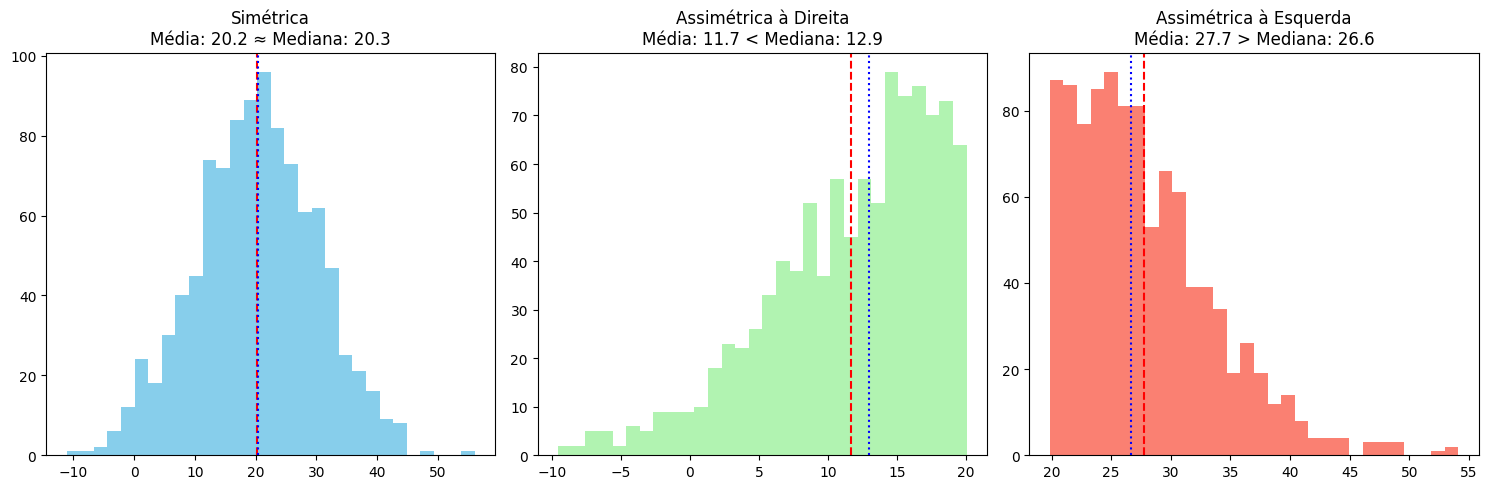


Coeficientes de Assimetria:
Simétrica: -0.057
Assimétrica à Direita: -0.633
Assimétrica à Esquerda: 0.566


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Configuração dos gráficos
plt.figure(figsize=(15, 5))

# Distribuição Simétrica (Normal)
plt.subplot(1, 3, 1)
dados_simetricos = skewnorm.rvs(0, size=1000) * 10 + 20
plt.hist(dados_simetricos, bins=30, color='skyblue')
plt.title(f"Simétrica\nMédia: {np.mean(dados_simetricos):.1f} ≈ Mediana: {np.median(dados_simetricos):.1f}")
plt.axvline(np.mean(dados_simetricos), color='red', linestyle='dashed')
plt.axvline(np.median(dados_simetricos), color='blue', linestyle='dotted')

# Distribuição Assimétrica à Direita
plt.subplot(1, 3, 2)
dados_direita = skewnorm.rvs(-100, size=1000) * 10 + 20
plt.hist(dados_direita, bins=30, color='lightgreen', alpha=0.7)
plt.title(f"Assimétrica à Direita\nMédia: {np.mean(dados_direita):.1f} < Mediana: {np.median(dados_direita):.1f}")
plt.axvline(np.mean(dados_direita), color='red', linestyle='dashed')
plt.axvline(np.median(dados_direita), color='blue', linestyle='dotted')

# Distribuição Assimétrica à Esquerda
plt.subplot(1, 3, 3)
dados_esquerda = skewnorm.rvs(100, size=1000) * 10 + 20
plt.hist(dados_esquerda, bins=30, color='salmon')
plt.title(f"Assimétrica à Esquerda\nMédia: {np.mean(dados_esquerda):.1f} > Mediana: {np.median(dados_esquerda):.1f}")
plt.axvline(np.mean(dados_esquerda), color='red', linestyle='dashed')
plt.axvline(np.median(dados_esquerda), color='blue', linestyle='dotted')

plt.tight_layout()
plt.show()

# Coeficiente de Assimetria de Pearson
def coeficiente_assimetria(dados):
    return 3 * (np.mean(dados) - np.median(dados)) / np.std(dados)

print("\nCoeficientes de Assimetria:")
print(f"Simétrica: {coeficiente_assimetria(dados_simetricos):.3f}")
print(f"Assimétrica à Direita: {coeficiente_assimetria(dados_direita):.3f}")
print(f"Assimétrica à Esquerda: {coeficiente_assimetria(dados_esquerda):.3f}")

## Medidas de variabilidade

Como dois conjuntos de dados compartilhar da mesma medida central, porém com divergências na dispersão desses valores, é necessário, além das medidas anteriores, termos uma forma de medir o grau de dispersão, ou seja, a variabilidade.

### Amplitude total

Trata-se da diferença entre o valor máximo e o valor mínimo de um conjunto de dados. Trata-se de uma medida simples e que não capta o que ocorre com outros valores, levando apenas dois valores em consideração.

### Desvio padrão

No desvio padrão, é realizado o cálculo do desvio de cada elemento do conjunto com o elemento central. Desta forma, são considerados todos os valores do conjunto de dados e, então, resumidos em um grau de dispersão.

Como o sinal não é importante para o cálculo do desvio padrão, que considera todos os elementos, devemos elevar cada diferença ao quadrado e, ao final do somatório dos resultados, calcular a raiz quadrada.

### Coeficiente de variação

O coeficiente de variação diz respeito à razão entre o desvio padrão e a média e serve para indicar se determinado desvio padrão é pequeno ou grande. O que ele indica é o quanto da escala de medida, representada pela média, é ocupada pelo desvio padrão.

Quanto menor for este coeficiente, menor é a variabilidade do conjunto de dados, pois o coeficiente expressa o quanto oo desvio padrão ocupa a escala de medida sendo, portanto, uma medida adimensional.

### Regra de desvio padrão para distribuições simétricas

Quando um conjunto de dados é simétrico, podemos determinar intervalos de frequência com base na média e no desvio padrão. Dessa forma, os dados podem estar inclusos em intervalos de desvio padrão que se afastam da média pela direita ou pela esquerda.

Por exemplo, para os tópicos acima:

In [28]:
# Dados de exemplo
dados1 = np.array([45, 50, 55, 50, 50, 50, 50, 50, 50, 50])
dados2 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Amplitude Total
def amplitude(dados):
    return np.max(dados) - np.min(dados)

print("\nAmplitude Total:")
print(f"Conjunto 1: {amplitude(dados1)}")
print(f"Conjunto 2: {amplitude(dados2)}")

# Desvio Padrão
print("\nDesvio Padrão:")
print(f"Conjunto 1: {np.std(dados1):.2f}")
print(f"Conjunto 2: {np.std(dados2):.2f}")

# Coeficiente de Variação
def coeficiente_variacao(dados):
    return (np.std(dados) / np.mean(dados)) * 100

print("\nCoeficiente de Variação (%):")
print(f"Conjunto 1: {coeficiente_variacao(dados1):.2f}%")
print(f"Conjunto 2: {coeficiente_variacao(dados2):.2f}%")


Amplitude Total:
Conjunto 1: 10
Conjunto 2: 90

Desvio Padrão:
Conjunto 1: 2.24
Conjunto 2: 28.72

Coeficiente de Variação (%):
Conjunto 1: 4.47%
Conjunto 2: 52.22%



Regra do Desvio Padrão para Distribuição Normal:
Média: 99.72
Desvio Padrão: 15.00

No intervalo 1σ (84.7 a 114.7) estão 68.02% dos dados
No intervalo 2σ (69.7 a 129.7) estão 95.46% dos dados
No intervalo 3σ (54.7 a 144.7) estão 99.79% dos dados


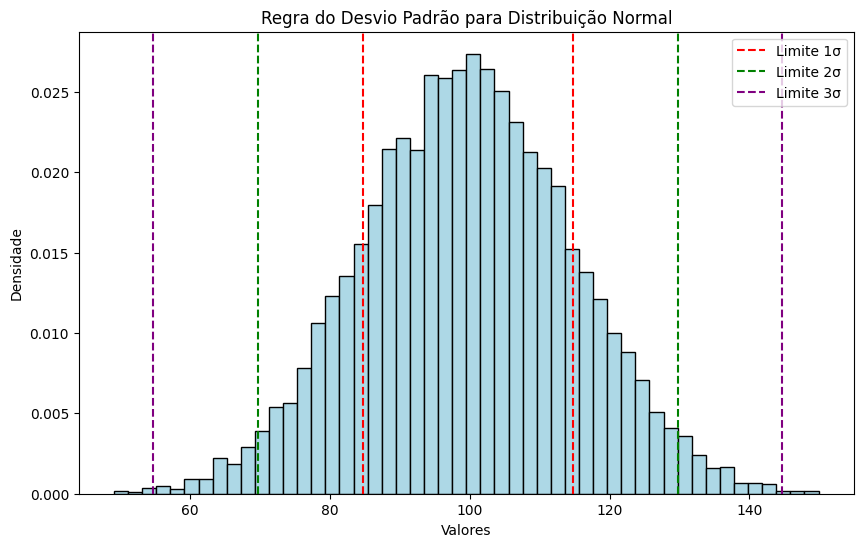

In [29]:
# Dados normalmente distribuídos
dados_normais = np.random.normal(100, 15, 10000)

# Calculando intervalos
media = np.mean(dados_normais)
desvio = np.std(dados_normais)

print("\nRegra do Desvio Padrão para Distribuição Normal:")
print(f"Média: {media:.2f}")
print(f"Desvio Padrão: {desvio:.2f}\n")

intervalos = {
    "1σ": (media - desvio, media + desvio),
    "2σ": (media - 2*desvio, media + 2*desvio),
    "3σ": (media - 3*desvio, media + 3*desvio)
}

for intervalo, (lim_inf, lim_sup) in intervalos.items():
    proporcao = np.sum((dados_normais >= lim_inf) & (dados_normais <= lim_sup)) / len(dados_normais)
    print(f"No intervalo {intervalo} ({lim_inf:.1f} a {lim_sup:.1f}) estão {proporcao*100:.2f}% dos dados")

# Visualização
plt.figure(figsize=(10, 6))
plt.hist(dados_normais, bins=50, color='lightblue', edgecolor='black', density=True)

# Linhas para os intervalos
colors = ['red', 'green', 'purple']
for i, (intervalo, (lim_inf, lim_sup)) in enumerate(intervalos.items()):
    plt.axvline(lim_inf, color=colors[i], linestyle='--', label=f'Limite {intervalo}')
    plt.axvline(lim_sup, color=colors[i], linestyle='--')

plt.title('Regra do Desvio Padrão para Distribuição Normal')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## Medidas de posição

As medidas de posição servem para resolver problemas de posicionamento de indivíduos dentro de um conjunto de dados.

### Percentis

A posição do indivíduo no conjunto de dados é representada pela porcentagem de outros indivíduos com valores menores.

Por exemplo:

Estatísticas descritivas:
Média: 39.10
Mediana (percentil 50): 39.00
Primeiro quartil (percentil 25): 27.25
Terceiro quartil (percentil 75): 50.50
Mínimo (percentil 0): 12.00
Máximo (percentil 100): 70.00


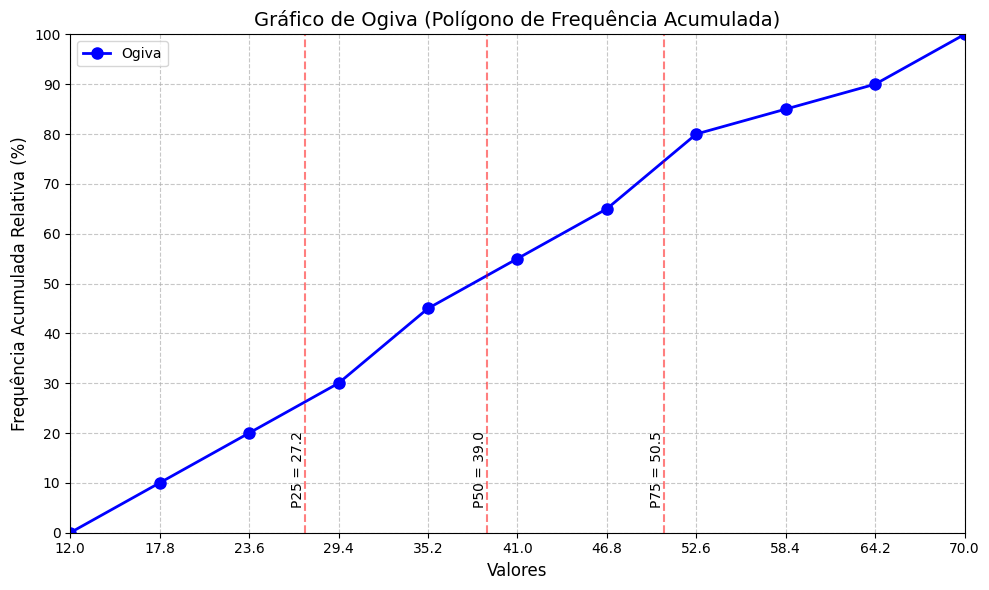

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
dados = np.array([12, 15, 18, 22, 25, 28, 30, 32, 35, 38, 40, 42, 45, 48, 50, 52, 55, 60, 65, 70])

# Cálculo de percentis
percentis = np.percentile(dados, [0, 25, 50, 75, 100])

print("Estatísticas descritivas:")
print(f"Média: {np.mean(dados):.2f}")
print(f"Mediana (percentil 50): {percentis[2]:.2f}")
print(f"Primeiro quartil (percentil 25): {percentis[1]:.2f}")
print(f"Terceiro quartil (percentil 75): {percentis[3]:.2f}")
print(f"Mínimo (percentil 0): {percentis[0]:.2f}")
print(f"Máximo (percentil 100): {percentis[4]:.2f}")

# Criando histograma para obter as frequências
frequencias, bordas = np.histogram(dados, bins=10)
frequencias_acumuladas = np.cumsum(frequencias)
frequencias_acumuladas_relativas = frequencias_acumuladas / len(dados) * 100
freq_acum_ogiva = np.insert(frequencias_acumuladas_relativas, 0, 0)

# Plotagem da ogiva
plt.figure(figsize=(10, 6))

# Gráfico de ogiva
plt.plot(bordas, freq_acum_ogiva, 'b-o', linewidth=2, markersize=8, label='Ogiva')

# Linha dos percentis importantes
for p, valor in zip([25, 50, 75], percentis[1:4]):
    plt.axvline(x=valor, color='r', linestyle='--', alpha=0.5)
    plt.text(valor, 5, f'P{p} = {valor:.1f}', rotation=90, va='bottom', ha='right')

# Configurações do gráfico
plt.title('Gráfico de Ogiva (Polígono de Frequência Acumulada)', fontsize=14)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência Acumulada Relativa (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(bordas)
plt.yticks(np.arange(0, 110, 10))
plt.xlim(bordas[0], bordas[-1])
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

### Escores padronizados

São medidas de posição que se aplicam a contextos em que há medidas de unidade distintas e necessidade de considerar a variabilidade dos resultados.

Para se obter o valor do escore padronizado, deve-se subtrair o escore original pela média para, então, dividir pelo desvio padrão. Deste modo, o escore padronizado calcula a distância do escore original à média em número de desvios padrões.

Por exemplo:

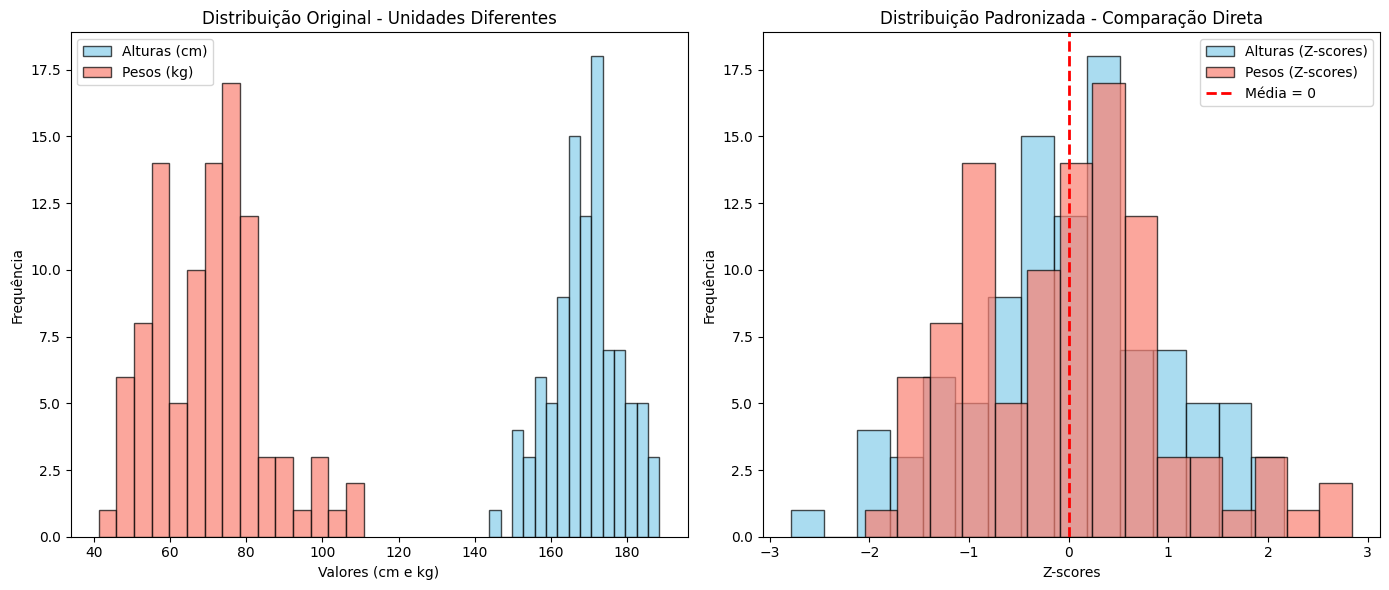

Comparação entre os grupos:
Média alturas (original): 168.96 cm
Média pesos (original): 70.33 kg

Média alturas (Z-scores): 0.00
Média pesos (Z-scores): -0.00

Desvio padrão alturas (Z-scores): 1.00
Desvio padrão pesos (Z-scores): 1.00

Exemplos de valores extremos:
Altura mais extrema: 143.80 cm (Z-score: -2.78)
Peso mais extremo: 110.80 kg (Z-score: 2.84)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Gerar dois conjuntos de dados com unidades diferentes
np.random.seed(42)
# Grupo 1: Alturas em centímetros
alturas = np.random.normal(loc=170, scale=10, size=100)
# Grupo 2: Pesos em quilogramas
pesos = np.random.normal(loc=70, scale=15, size=100)

# Calcular Z-scores para cada grupo
z_alturas = stats.zscore(alturas)
z_pesos = stats.zscore(pesos)

# Criar gráfico comparativo
plt.figure(figsize=(14, 6))

# Gráfico 1: Dados originais
plt.subplot(1, 2, 1)
plt.hist(alturas, bins=15, alpha=0.7, color='skyblue', edgecolor='black', label='Alturas (cm)')
plt.hist(pesos, bins=15, alpha=0.7, color='salmon', edgecolor='black', label='Pesos (kg)')
plt.title('Distribuição Original - Unidades Diferentes')
plt.xlabel('Valores (cm e kg)')
plt.ylabel('Frequência')
plt.legend()

# Gráfico 2: Dados padronizados
plt.subplot(1, 2, 2)
plt.hist(z_alturas, bins=15, alpha=0.7, color='skyblue', edgecolor='black', label='Alturas (Z-scores)')
plt.hist(z_pesos, bins=15, alpha=0.7, color='salmon', edgecolor='black', label='Pesos (Z-scores)')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label='Média = 0')
plt.title('Distribuição Padronizada - Comparação Direta')
plt.xlabel('Z-scores')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

# Comparação estatística
print("Comparação entre os grupos:")
print(f"Média alturas (original): {np.mean(alturas):.2f} cm")
print(f"Média pesos (original): {np.mean(pesos):.2f} kg")
print(f"\nMédia alturas (Z-scores): {np.mean(z_alturas):.2f}")
print(f"Média pesos (Z-scores): {np.mean(z_pesos):.2f}")
print(f"\nDesvio padrão alturas (Z-scores): {np.std(z_alturas):.2f}")
print(f"Desvio padrão pesos (Z-scores): {np.std(z_pesos):.2f}")

# Exemplos de valores extremos
print("\nExemplos de valores extremos:")
idx_altura_extrema = np.argmax(np.abs(z_alturas))
idx_peso_extremo = np.argmax(np.abs(z_pesos))
print(f"Altura mais extrema: {alturas[idx_altura_extrema]:.2f} cm (Z-score: {z_alturas[idx_altura_extrema]:.2f})")
print(f"Peso mais extremo: {pesos[idx_peso_extremo]:.2f} kg (Z-score: {z_pesos[idx_peso_extremo]:.2f})")

## Boxplot

Trata-se um gráfico para destaque de valores discrepantes (outliers), ou seja, valores muito diferentes do restante do conjunto de dados. Esses dados podem ser erros ou valores corretos que precisam ser investigados.

Este é um tipo de gráfico que permite analisar o formato de distribuição de frequências em um conjunto de valores, também, bem como variabilidade e tendência central. Também é muito usado para representar e comparar grupos numa mesma figura. Porém, o boxplot possui a restrição de não poder ser usado para distribuições de frequência multimodais, ou seja, conjuntos de dados que possuam mais de um pico de valores extremos.

Veja o exemplo:

/tmp/ipython-input-36-4023732836.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(dados,


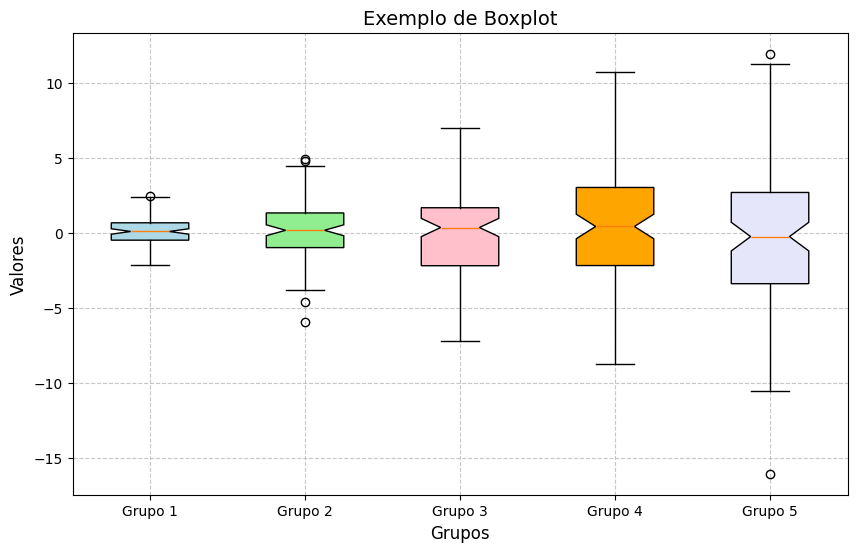

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o boxplot (5 conjuntos de dados aleatórios)
np.random.seed(10)  # Para reproduzir os mesmos resultados
dados = [np.random.normal(0, std, 100) for std in range(1, 6)]

# Criando o boxplot
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Criando o boxplot com personalizações
box = plt.boxplot(dados,
                  patch_artist=True,  # Permite preenchimento de cor
                  notch=True,        # Cria um recorte na mediana
                  vert=True,          # Orientação vertical
                  labels=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'])

# Personalizando cores
colors = ['lightblue', 'lightgreen', 'pink', 'orange', 'lavender']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adicionando título e rótulos
plt.title('Exemplo de Boxplot', fontsize=14)
plt.xlabel('Grupos', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Adicionando grade para melhor leitura
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrando o gráfico
plt.show()

## Comparação gráfica de conjuntos de dados

Com tantas opções de formas de representar conjuntos de dados é necessário, agora, pensar em qual ou quais ferramentas melhor se aplicam ao determinado contexto, com base nas vantagens e desvantagens de cada uma das formas mostradas, especialmente para comparação entre grupos de dados.

# Desafio 4

Agora é sua vez!

Acesse o desafio da aula e resolva um problema real com os conceitos e ferramentas vistos até aqui e com sua exploração das ferramentas disponíveis. Não deixe de pesquisar, estudar e testar formas de resolver o problema.

PDF do desafio disponível [aqui](https://drive.google.com/file/d/1ROOmpxqKEUOrZBuJGLk-omxCyfkCn6iX/view?usp=sharing).